## Analysis of Mint Budget Data

This notebook aims to answer the following questions:
- What do I spend most of my money on?

In [3]:
%matplotlib inline

# import libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.plotly as py

# Custom libs
from lib.python_mint import * 

# Specify the default figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Import and Clean 
Bring in all of the data and break out only the information that we're interested in. For more information on what is actually being done here take a look at the mint_analysis found in the lib folder. 

In [4]:
# Read in The data
df = import_transactions()

In [6]:
# Cleaning: This removes things like, income, transfers, taxes, reimbursments, etc. 
df2 = clean_transactions(df)

# Split up all labels 
#df['Labels'] = df['Labels'].str.split(' ', expand=True)
#df['Labels'] = df['Labels'].str.split(' ')

In [7]:
# Create the column 'Macro Category' that describes the 'Category field at a higher level
df3 = build_macro_categories(df2)

In [10]:
my_labels = df.Labels.unique()
str_labels = my_labels.astype(str).tolist()

type(str_labels[0])


broken_labels = [i.split(' ') for i in str_labels]
set(broken_labels)

TypeError: unhashable type: 'list'

In [11]:
# Detect all tags present in the data
df[df.Labels.notnull()].Labels

df.Labels.unique()

array([nan, 'Type_Reimbursable', 'Group_BCCRS Meal_Dinner', 'Meal_Dinner',
       'Meal_Lunch Person_Amanda', 'Meal_Lunch',
       'Meal_Snack Person_Amanda', 'Meal_Snack',
       'Meal_Dinner Person_Amanda', 'Event_Other Group_BCCRS Person_Other',
       'Activity_Garden', 'ClosedByChris Meal_Lunch', 'Type_Subscription',
       'Meal_Breakfast', 'ClosedByChris Group_BCCRS Type_Subscription',
       'ClosedByChris Type_Rental', 'Activity_Running',
       'Meal_Breakfast Person_Amanda', 'Person_Amanda', 'Event_Vacation',
       'Group_BCCRS Meal_Lunch', 'Event_Birthday Person_Mom',
       'Group_BCCRS Meal_Breakfast', 'Event_Birthday Person_Mom Type_Gift',
       'Event_Birthday', 'Group_BCCRS', 'Taxes',
       'Event_Vacation Meal_Breakfast', 'Event_Vacation Meal_Dinner',
       'Activity_Skiing Event_Vacation Type_Rental',
       'Event_Vacation Meal_Lunch', 'Activity_Skiing',
       'Event_Birthday Person_Amanda Type_Gift',
       'Event_Birthday Person_Brother Type_Gift',
       'Ac

In [12]:
df3[df3['Category'] == 'Income']

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes,Macro Category
372,2/16/2016,Refund Sqc Zach,1 02/15 #000227136 REFUND SQC*<ZACH RASMOR SAN...,69.00,credit,Income,CHECKING,[None],Food refund. No rent this month!!,NaN
519,12/21/2015,Online Banking Transfer,Online Banking transfer from SAV 6734 Confirma...,911.72,credit,Income,CHECKING,[None],None,NaN
1507,1/09/2015,Sqc Amanda Ma,SQC*<AMANDA MA 01/09 #000453403 REFUND SQC*<AM...,98.34,credit,Income,CHECKING,[Person_Other],None,NaN
1609,12/03/2014,Sqc Colin Mcg,SQC*<COLIN MCG 12/03 #000221823 REFUND SQC*<CO...,20.00,credit,Income,CHECKING,[None],None,NaN
1616,12/01/2014,Bkofamerica Mobile Deposit,BKOFAMERICA MOBILE 12/01 3317736474 DEPOSIT *M...,28.00,credit,Income,CHECKING,[None],None,NaN
1721,10/28/2014,Bkofamerica Mobile Deposit,BKOFAMERICA MOBILE 10/28 3311666466 DEPOSIT *M...,138.00,credit,Income,CHECKING,[None],None,NaN
1811,9/23/2014,Sqc Cash Refund,SQC*<THE CASH 09/23 #000012758 REFUND SQC*<THE...,1.00,credit,Income,CHECKING,[None],None,NaN
1812,9/23/2014,Sqc Cash Refund,SQC*<THE CASH 09/23 #000071539 REFUND SQC*<THE...,1.00,credit,Income,CHECKING,[None],None,NaN
1868,9/12/2014,Sqc Edward Ve,SQC*<EDWARD VE 09/11 #000055870 REFUND SQC*<ED...,20.00,credit,Income,CHECKING,[None],None,NaN
1887,9/05/2014,Sqc Andrew Refund,SQC*<ANDREW> 09/05 #000468710 REFUND SQC*<ANDR...,20.00,credit,Income,CHECKING,[None],None,NaN


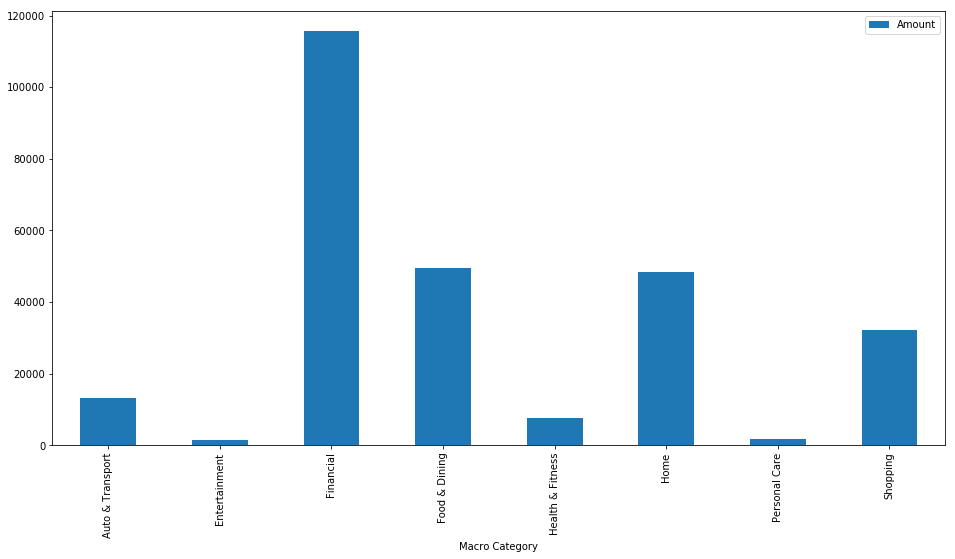

In [13]:
# Total spending by macro category

# Specify the figure size
plt.rcParams['figure.figsize'] = (16.0, 8.0)
df3.groupby('Macro Category').sum().plot(kind='bar')


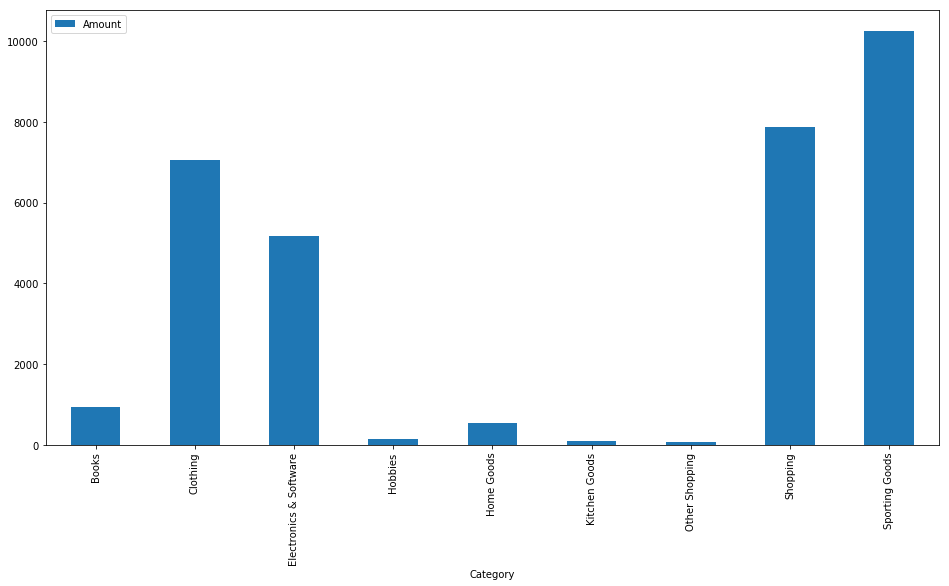

In [14]:
# Breakout a single Macro Category to explore the categories within it
#varCategory = 'Food & Dining'
varCategory = 'Shopping'

#df[df['Macro Category'] == 'Auto & Transport'].groupby('Category').sum()

# Specify the figure size
plt.rcParams['figure.figsize'] = (16.0, 8.0)
df3[df3['Macro Category'] == varCategory].groupby('Category').sum().plot(kind='bar')


In [15]:
# Plot spending by month

df3.groupby([df3['Date'].dt.year, df3['Date'].dt.month]).sum().plot()

AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
# Now plot spending by month broken up into macro cateogries
df3.groupby([pd.Grouper(freq='M',key='Date'), 'Macro Category']).sum().unstack().plot()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [17]:
# Look within a specific macro category to see how spending was broken down month to month

#varCategory = 'Food & Dining'
varCategory = 'Shopping'
#dfIncome.plot()

#dfIncome.groupby([pd.Grouper(freq='M',key='Date')]).sum().plot()

plt.figure('Macro by Time')
df3[df3['Macro Category'] == varCategory].groupby([pd.Grouper(freq='M',key='Date'), 'Category']).sum().unstack().plot()



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'